In [2]:
from model.model import SpecVAE
from data_loader.data_loaders import EscDataLoader
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.nn import functional as F
from torch.optim import Adam

In [7]:
x_path = "/Users/Dovermore/Documents/2021t1/VAE-audio/vae-audio-github/saved/samples/SpecVAE/0316_154453/2-82538-A-21.npy"
recon_path = "/Users/Dovermore/Documents/2021t1/VAE-audio/vae-audio-github/saved/samples/SpecVAE/0316_154453/2-82538-A-21_recon.npy"
x = np.load(x_path)
recon = np.load(recon_path)

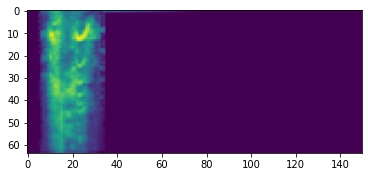

In [8]:
plt.imshow(x)

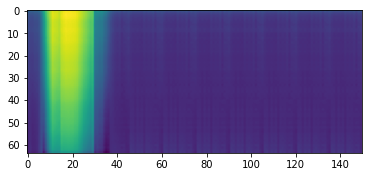

In [9]:
plt.imshow(recon)